<h1><b>Actividad Semanal 4</b><h1>
<hr>


Alumnos: 

*   Rojas Zepeda Luis Eduardo - A01794121 <br>
*   Giovanni Acuña Morales - A01794007

Profesor:	Jobish Vallikavungal Devassia 

Director: Orlando Figón Cruz

<br>

Datos:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<hr>

<h2><b> Parte 1: Ejercicio guiado </b></h2>

<h3><b>Paso 1: </b></h3>

Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

<h3><b>Eliminación de columnas de categorias</b></h3>

In [2]:
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
# details: https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt

df = pd.read_csv(url)
df = df.drop(['ID', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y'], axis = 1)
df.columns

Index(['X1', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23'],
      dtype='object')

In [3]:
df.shape

(30000, 15)

In [4]:
print(f'Cantidad de columnas: {df.shape[0]}\nCantidad de Registros : {df.shape[1]}')

Cantidad de columnas: 30000
Cantidad de Registros : 15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X10     29984 non-null  float64
 2   X11     29986 non-null  float64
 3   X12     29989 non-null  float64
 4   X13     29989 non-null  float64
 5   X14     29987 non-null  float64
 6   X15     29985 non-null  float64
 7   X16     29983 non-null  float64
 8   X17     29990 non-null  float64
 9   X18     29992 non-null  float64
 10  X19     29991 non-null  float64
 11  X20     29992 non-null  float64
 12  X21     29989 non-null  float64
 13  X22     29989 non-null  float64
 14  X23     29995 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 3.4 MB


<h3><b>Renombrar columnas</b></h3>

In [6]:
df.rename(columns = {
    'X1' : 'Amount Credit',
    'X5' : 'Age',
    'X10' : 'repayment March 2005',
    'X11' : 'repayment April 2005',
    'X12' : 'Bill September 2005',
    'X13' : 'Bill August 2005',
    'X14' : 'Bill July 2005',
    'X15' : 'Bill June 2005',
    'X16' : 'Bill May 2005',
    'X17' : 'Bill April 2005',
    'X18' : 'Pay September 2005',
    'X19' : 'Pay August 2005',
    'X20' : 'Pay July 2005',
    'X21' : 'Pay June 2005',
    'X22' : 'Pay May 2005',
    'X23' : 'Pay April 2005'
  },
    inplace=True
  )
df.columns

Index(['Amount Credit', 'repayment March 2005', 'repayment April 2005',
       'Bill September 2005', 'Bill August 2005', 'Bill July 2005',
       'Bill June 2005', 'Bill May 2005', 'Bill April 2005',
       'Pay September 2005', 'Pay August 2005', 'Pay July 2005',
       'Pay June 2005', 'Pay May 2005', 'Pay April 2005'],
      dtype='object')

<h3><b>Normalización</b></h3>

# Eliminar registros con campos nulos

In [7]:
df.dropna()

,Amount Credit,repayment March 2005,repayment April 2005,Bill September 2005,Bill August 2005,Bill July 2005,Bill June 2005,Bill May 2005,Bill April 2005,Pay September 2005,Pay August 2005,Pay July 2005,Pay June 2005,Pay May 2005,Pay April 2005
0,20000,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,0.0,-1.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


# Correlación de variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount Credit         30000 non-null  int64  
 1   repayment March 2005  29984 non-null  float64
 2   repayment April 2005  29986 non-null  float64
 3   Bill September 2005   29989 non-null  float64
 4   Bill August 2005      29989 non-null  float64
 5   Bill July 2005        29987 non-null  float64
 6   Bill June 2005        29985 non-null  float64
 7   Bill May 2005         29983 non-null  float64
 8   Bill April 2005       29990 non-null  float64
 9   Pay September 2005    29992 non-null  float64
 10  Pay August 2005       29991 non-null  float64
 11  Pay July 2005         29992 non-null  float64
 12  Pay June 2005         29989 non-null  float64
 13  Pay May 2005          29989 non-null  float64
 14  Pay April 2005        29995 non-null  float64
dtypes: float64(14), int

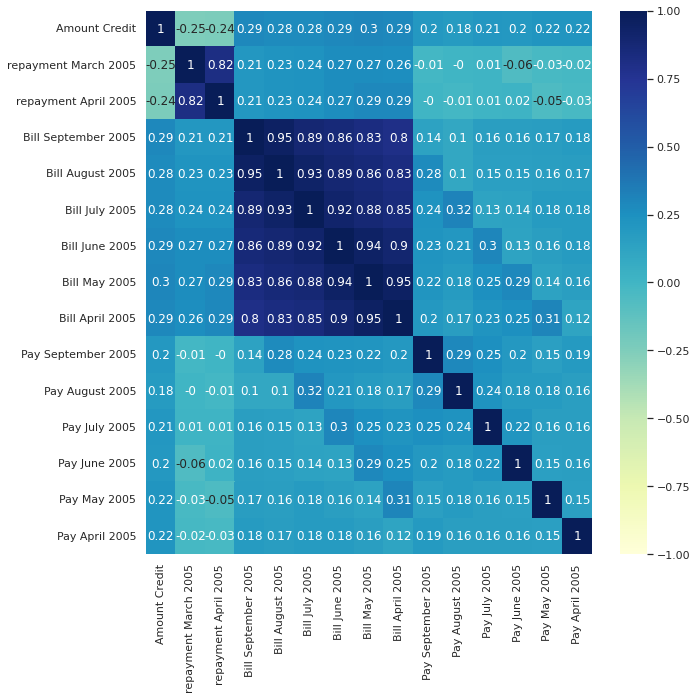

In [9]:
corr = df.corr()
sns.set(rc = {'figure.figsize': (10,10)})
sns.heatmap(corr.round(2), vmin = -1, vmax = 1, cmap = 'YlGnBu', annot = True)

# Generación de PCA

In [10]:
pcs = PCA()
pcs.fit(preprocessing.scale(df.iloc[:,:].dropna(axis = 0)))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                              })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Standard deviation,2.4592,1.4709,1.1822,0.9514,0.9404,0.9346,0.8841,0.8523,0.7907,0.5071,0.4221,0.2657,0.2025,0.1592,0.1524
Proportion of variance,0.4032,0.1442,0.0932,0.0603,0.0590,0.0582,0.0521,0.0484,0.0417,0.0171,0.0119,0.0047,0.0027,0.0017,0.0015
Cumulative proportion,0.4032,0.5474,0.6406,0.7009,0.7599,0.8181,0.8702,0.9186,0.9603,0.9774,0.9893,0.9940,0.9968,0.9985,1.0000


Se puede determinar que los componentes principales estaría dentro de la variación del 80% y también se evidencia componentes o varibles que llegan al 87% de variación

# Paso #2 : Interprete cada componente principal en términos de las variables originales.

Interprete cada componente principal en términos de las variables originales.

Examine la magnitud y la dirección de los coeficientes de las variables originales. Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

Primero vamos a comparar los componentes con las variables originales para identificar cuales aportan un mayor peso.

In [11]:
pcsComponents = pd.DataFrame(pcs.components_.transpose(),
                             columns = pcsSummary_df.columns,
                             index = df.columns).abs()
pcsComponents = pcsComponents.iloc[:,:7]
pcsComponents

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Amount Credit,0.145694,0.396176,0.123938,0.101006,0.005640,0.078368,0.115409
repayment March 2005,0.122791,0.507785,0.387417,0.102439,0.074210,0.009216,0.048355
repayment April 2005,0.126663,0.498481,0.399300,0.115577,0.008006,0.060428,0.012627
Bill September 2005,0.367929,0.045317,0.217884,0.020235,0.029688,0.048903,0.003858
Bill August 2005,0.379193,0.045664,0.183374,0.057928,0.060248,0.036399,0.038796
Bill July 2005,0.384547,0.031091,0.117169,0.100662,0.113995,0.081794,0.127751
Bill June 2005,0.388878,0.041448,0.091376,0.091784,0.016061,0.020275,0.122966
Bill May 2005,0.386375,0.040909,0.069679,0.029438,0.134368,0.064544,0.007096
Bill April 2005,0.378473,0.032993,0.067261,0.105832,0.125664,0.098421,0.007744
Pay September 2005,0.128396,0.239696,0.346621,0.402967,0.158437,0.026637,0.212586


Ahora obtendremos el valor máximo y mínimio en cada componente o columna.

In [12]:
pcsComponents.abs().idxmax()

PC1          Bill June 2005
PC2    repayment March 2005
PC3    repayment April 2005
PC4            Pay May 2005
PC5           Pay June 2005
PC6          Pay April 2005
PC7           Pay July 2005
dtype: object

In [13]:
pcsComponents.abs().idxmin()

PC1          Pay April 2005
PC2          Bill July 2005
PC3         Bill April 2005
PC4     Bill September 2005
PC5           Amount Credit
PC6    repayment March 2005
PC7     Bill September 2005
dtype: object

#Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

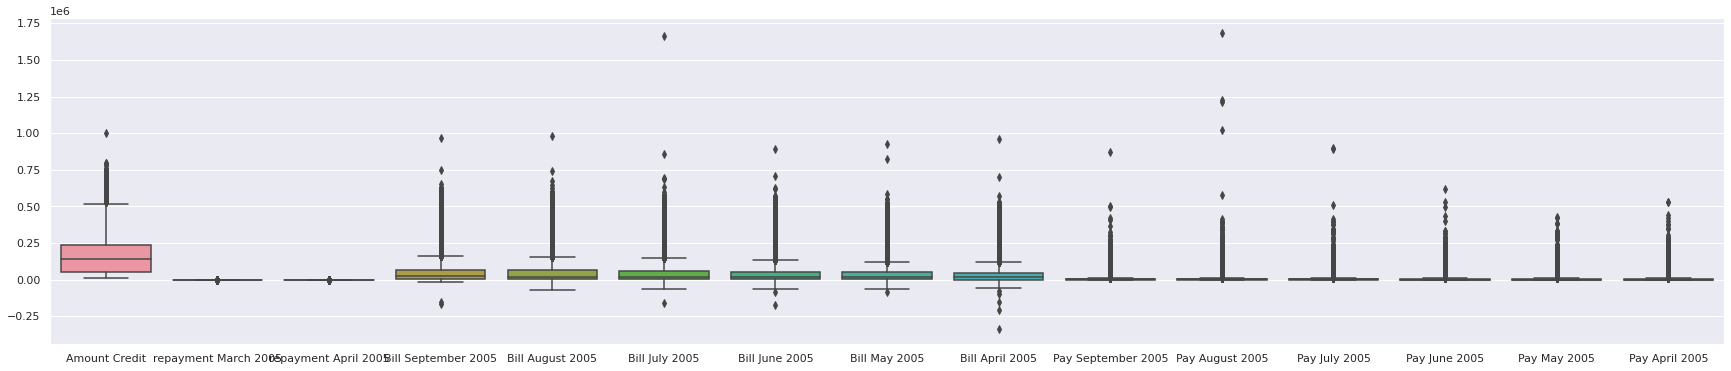

In [14]:
df_valores_Atipicos = df.copy()
plt.figure(figsize = (30, 6))
sns.boxplot(data = df_valores_Atipicos, width = 0.8)
plt.show()

<hr>

<h2><b>Parte 2:</b></h2> 

Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

1.   ¿Cuál es el número de componentes mínimo y por qué?<br>

    Creemos que el componente mínimo es "Pay April 2005", debido que en la función abs().idxmin(), nos lo indica

2.   ¿Cuál es la variación de los datos que representan esos componentes?<br>

    La gráfica del punto 1 se evidencia que ronda el 80% - 90 %.

3. ¿Cuál es la pérdida de información después de realizar PCA?<br>
    La perdida de información está alrededor del 5 - 10%, esto debido al momento de la normalización se perdieron datos por tener registros vácios o nulos.
4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?<br>
    Los componentes con mayor importancia son las que indican los pagos entre los más destacables esta: "Bill June 2005"
    y la de menor importancia es "Pay April 2005", esto debido a que su variance es muy bajo.
5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?<br>
    Se recomienda el uso de PCA para reducir la dimensionalidad de un dataset con el fin de simplificar el pintado o diseño de una grafica.

